In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import folium
%matplotlib inline

In [2]:
df = pd.read_csv("london_crime_by_lsoa.csv")
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [3]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    1
minor_category    1
value             1
year              1
month             1
dtype: int64

# Bar Chart

In [4]:
df_bar = df[["borough","value", "year"]]                                         #Slicing kolom yang digunakan

df_bar_2008 = df_bar[(df_bar.year == 2008)]                                      #Slicing tahun yang ingin digunakan
print(df_bar_2008) 

                      borough  value    year
4                  Wandsworth    0.0  2008.0
33                   Havering    0.0  2008.0
34                 Hillingdon    0.0  2008.0
46                Westminster    0.0  2008.0
54                     Bexley    1.0  2008.0
...                       ...    ...     ...
2851001                Bexley    1.0  2008.0
2851002              Hounslow    2.0  2008.0
2851016            Wandsworth    0.0  2008.0
2851017               Lambeth    0.0  2008.0
2851023  Richmond upon Thames    0.0  2008.0

[316737 rows x 3 columns]


In [5]:
xlabel = df_bar_2008["borough"].unique()                                         #Menggunakan kolom borough sebagai label

lengthx = np.arange(len(xlabel))                                                 #Menghitung jumlah label di sumbu x

sums = df_bar_2008.groupby("borough").sum()                                      #Menghitung total kriminal pada kolom borough(wilayah)
total = sums["value"].to_numpy()

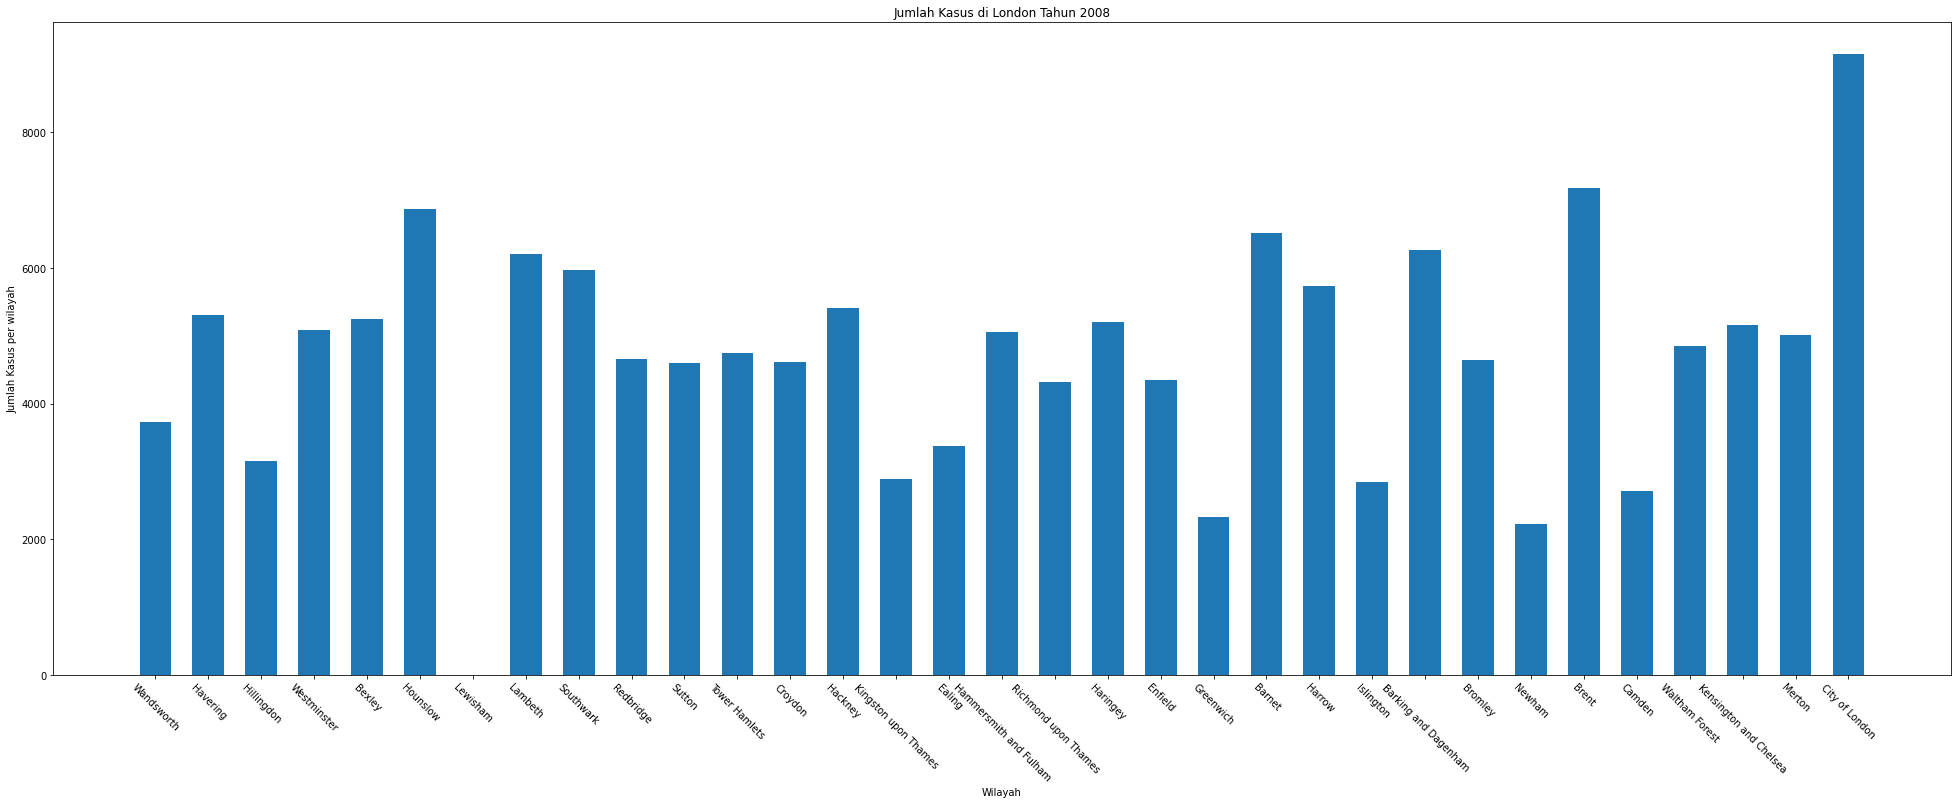

In [35]:
plt.figure(figsize=(34,12))
plt.bar(lengthx, total, width=0.6)

plt.xticks(lengthx, xlabel)
plt.xticks(rotation=-45)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kasus per wilayah')
plt.title('Jumlah Kasus di London Tahun 2008')
plt.show()

# Pie Chart

In [7]:
df_pie = df[["borough","major_category", "value","year"]]
df_pie.head()

,borough,major_category,value,year
0,Croydon,Burglary,0.0,2016.0
1,Greenwich,Violence Against the Person,0.0,2016.0
2,Bromley,Violence Against the Person,0.0,2015.0
3,Redbridge,Burglary,0.0,2016.0
4,Wandsworth,Robbery,0.0,2008.0


In [8]:
df_pie_southwark = df_pie[(df_pie.borough == "Southwark")]
df_pie_southwark.head() 

,borough,major_category,value,year
39,Southwark,Drugs,0.0,2015.0
64,Southwark,Theft and Handling,4.0,2016.0
70,Southwark,Violence Against the Person,0.0,2008.0
113,Southwark,Violence Against the Person,0.0,2010.0
123,Southwark,Burglary,0.0,2009.0


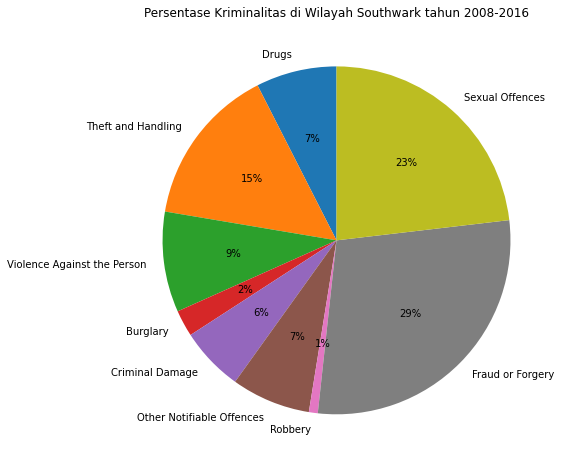

In [9]:
values = df_pie_southwark.groupby(["major_category"]).size()
label = df_pie_southwark["major_category"].unique()
plt.figure(figsize=(12,8))
plt.pie(values, labels = label, autopct="%1.0f%%", startangle=90)
plt.title("Persentase Kriminalitas di Wilayah Southwark tahun 2008-2016")
plt.show()

# Box Plot

In [10]:
new_df = df[["borough","value","year"]]
new_df

,borough,value,year
0,Croydon,0.0,2016.0
1,Greenwich,0.0,2016.0
2,Bromley,0.0,2015.0
3,Redbridge,0.0,2016.0
4,Wandsworth,0.0,2008.0
...,...,...,...
2851030,Haringey,2.0,2014.0
2851031,Richmond upon Thames,0.0,2013.0
2851032,Richmond upon Thames,0.0,2012.0
2851033,Bexley,0.0,2011.0


In [11]:
df_croydon = new_df[df.borough == "Croydon"]                                     #membuat dataframe wilayah Croydon

df_brent = new_df[df.borough  == "Brent"]                                        #membuat dataframe wilayah Brent

In [12]:
df_croydon= df_croydon.groupby("year").sum()                                     #menggabungkan kolom value tahun pada wilayah croydon

df_croydon=df_croydon.rename(columns={"value":"croydon"})                        #mengubah nama kolom
df_croydon

,croydon
year,
2008.0,6211.0
2009.0,6374.0
2010.0,6241.0
2011.0,6285.0
2012.0,6169.0
2013.0,5953.0
2014.0,5633.0
2015.0,6044.0
2016.0,5922.0


In [13]:
df_brent= df_brent.groupby("year").sum()                                         #menggabungkan kolom value tahun pada wilayah croydon

df_brent= df_brent.rename(columns={"value":"brent"})                             #mengubah nama kolom
df_brent

,brent
year,
2008.0,5081.0
2009.0,5283.0
2010.0,5275.0
2011.0,5811.0
2012.0,5629.0
2013.0,4961.0
2014.0,5311.0
2015.0,5274.0
2016.0,5638.0


In [14]:
df_brent["croydon"] = df_croydon["croydon"]                                       #menggabungkan kedua dataframe
newest_box = df_brent
newest_box

,brent,croydon
year,,
2008.0,5081.0,6211.0
2009.0,5283.0,6374.0
2010.0,5275.0,6241.0
2011.0,5811.0,6285.0
2012.0,5629.0,6169.0
2013.0,4961.0,5953.0
2014.0,5311.0,5633.0
2015.0,5274.0,6044.0
2016.0,5638.0,5922.0


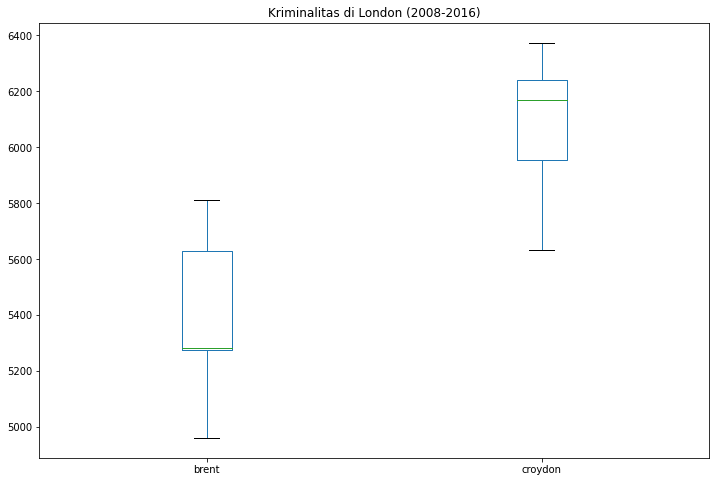

In [25]:
newest_box.plot(kind='box', figsize=(12,8)) 
plt.title("Kriminalitas di London (2008-2016)")
plt.show()

# Area Plot

In [16]:
df_area = df[["year", "value"]]

df_group = df_area.groupby("year").sum()                                         #Menggabungkan kolom tahun
label_area = df["year"].unique()                                                 #Menggunakan kolom tahun sebagai label

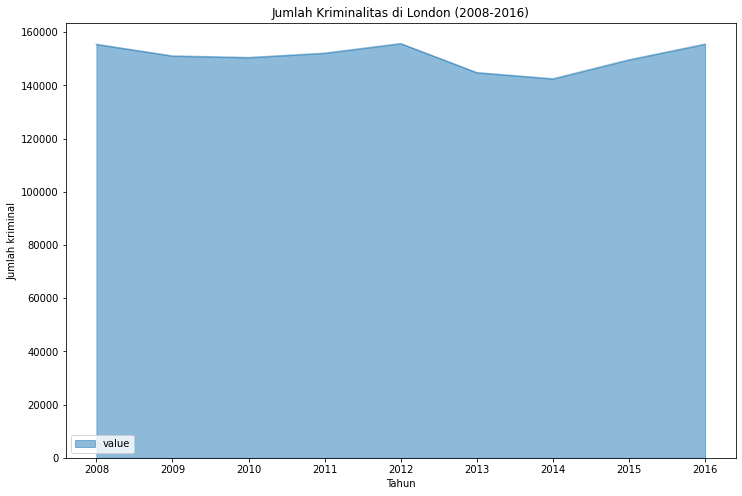

In [26]:
df_group.plot(kind="area", alpha=0.5, figsize=(12,8))
plt.ylabel("Jumlah kriminal")
plt.xlabel("Tahun")
plt.title("Jumlah Kriminalitas di London (2008-2016)")
plt.show()

# Histogram

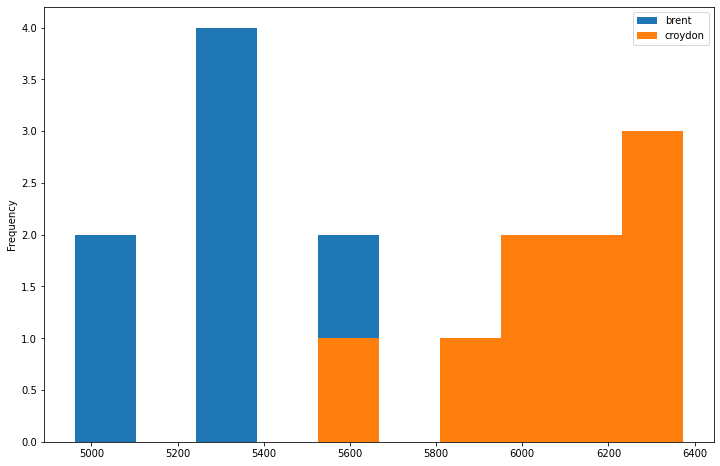

In [27]:
newest_box.plot(kind='hist', figsize=(12,8))
plt.show()

# Scatter Plot

In [19]:
scatter_df = newest_box.reset_index()
scatter_df

,year,brent,croydon
0,2008.0,5081.0,6211.0
1,2009.0,5283.0,6374.0
2,2010.0,5275.0,6241.0
3,2011.0,5811.0,6285.0
4,2012.0,5629.0,6169.0
5,2013.0,4961.0,5953.0
6,2014.0,5311.0,5633.0
7,2015.0,5274.0,6044.0
8,2016.0,5638.0,5922.0


<Figure size 864x576 with 0 Axes>

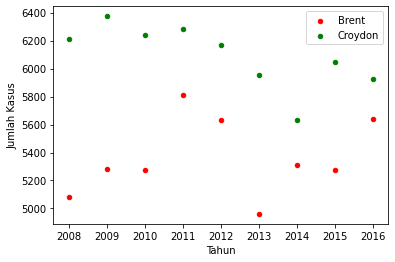

In [28]:
plt.figure(figsize=(12,8))
ax0 = scatter_df.plot(kind="scatter", x="year", y="brent", color='red')
ax1 = scatter_df.plot(kind="scatter", x="year", y="croydon", color='green', ax=ax0)

ax0.set_xlabel("Tahun")
ax0.set_ylabel("Jumlah Kasus")
ax0.legend(["Brent","Croydon"], loc="upper right")
plt.show()

# Folium MAPS

In [21]:
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[54.237933,-2.36967],zoom_start=5,tiles = 'Mapbox Bright')

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)

#folium.LayerControl().add_to(world_map)
world_map.save('LondonCrime.html')
display(world_map)

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Word Clouds

In [22]:
new_text = " ".join(str(i) for i in df.borough)                                  #Melakukan perulangan pada kolom borough.

wc = WordCloud(max_words=60, background_color='white').generate(new_text)        #Generate 60 kata

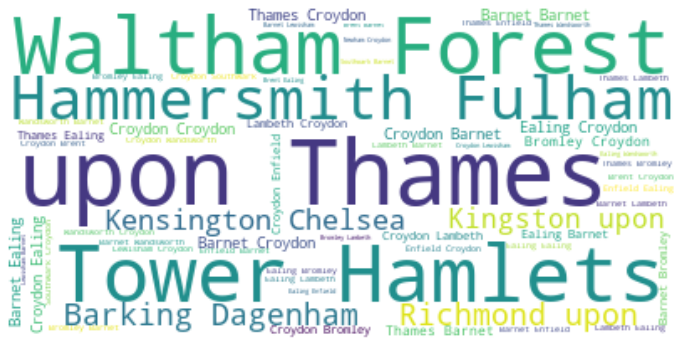

In [29]:

plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analisa Data

1. Kasus kriminal tertinggi saat tahun 2008 terjadi di City of London
2. Kategori Kriminalitas tertinggi di Wilayah Southwark adalah Kasus Fraud dan Sexual Offence 
3. Jumlah Kriminalitas terendah di London terjadi pada tahun 2014
4. Croydon memiliki median tertinggi dibanding brent
5. Histogram kriminalitas wilayah croydon lebih tinggi dibanding brent
6. Dari data visual scatter plot menunjukan jumlah kriminalitas terendah di wilayah brent terjadi pada tahun 2008 sedangkan wilayah croydon pada tahun 2014.
7. Jumlah kata yang paling sering muncul adalah kata Thames
